<a href="https://colab.research.google.com/github/Cauet-Menezes/Inteligencia_Artificial/blob/main/Algoritmo_genetico_particao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Nome: Cauet Corrêa de Menezes
## Nome: Gustavo Carvalho Alves dos Santos

Fitness médio da população inicial: 21.92
Fitness médio da população final: 4.16


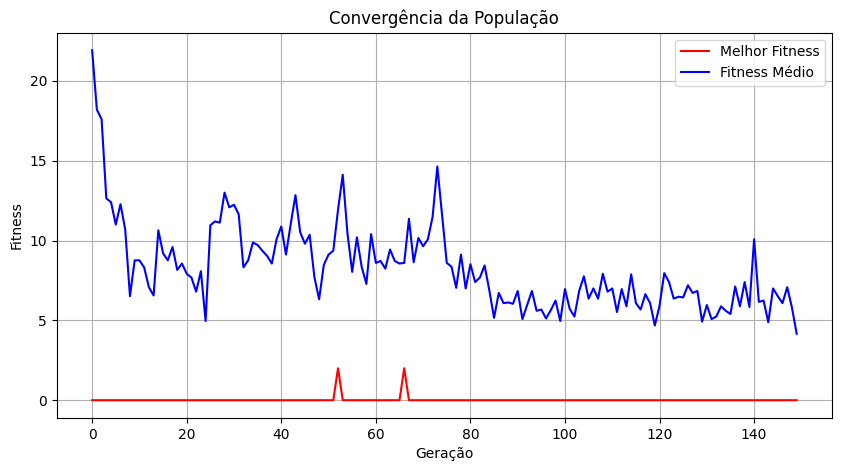

In [68]:
import numpy as np
import matplotlib.pyplot as plt

dimensao = 30                                # Numero de genes
pop_size = 50                                # Tamanho da populacao
k = 3                                        # Pressao seletiva
vet_int = np.random.randint(0, 10, dimensao) # Parametro para o fitness
probabilidade_de_mutacao = 0.02              # Probabilidade de mutacao
probabilidade_de_crossover = 0.9             # Probabilidade de crossover
numero_de_geracoes = 150                     # Numero de geracoes

# Gera a população inicial
def gera_populacao(dimensao, pop_size):
    return np.random.randint(0, 2, (pop_size, dimensao))

# Avalia o fitness
def avalia_fitness(individuo, vet_int):
    indice_A = np.where(individuo == 1)
    indice_B = np.where(individuo == 0)
    A = vet_int[indice_A]
    B = vet_int[indice_B]
    return np.abs(np.sum(A) - np.sum(B))

# Seleção por torneio
def selecao_torneio(pop, fitness, k):
    indices_selecionados = np.random.randint(0, pop_size, k)
    indice_fit = np.argmin(fitness[indices_selecionados])
    return pop[indices_selecionados[indice_fit]]

# Mutação
def mutacao(individuo, probabilidade_de_mutacao):
    for i in range(len(individuo)):
        if np.random.rand() < probabilidade_de_mutacao:
            individuo[i] = 1 - individuo[i]  # Inversão do gene
    return individuo

# Cruzamento
def crossover(individuo1, individuo2, probabilidade_de_crossover):
    if np.random.rand() < probabilidade_de_crossover:
        ponto = np.random.randint(1, len(individuo1) - 1)  # Ponto de crossover aleatório
        filho_1 = np.concatenate((individuo1[:ponto], individuo2[ponto:]))
        filho_2 = np.concatenate((individuo2[:ponto], individuo1[ponto:]))
        return filho_1, filho_2
    return individuo1.copy(), individuo2.copy()

# Gerar população inicial
pop = gera_populacao(dimensao, pop_size)
fitness = np.zeros(pop_size)

# Armazenar o melhor fitness em cada geração
historico_melhor_fitness = []
historico_fitness_medio = []

# Avaliar fitness inicial da população e armazenar a média
for i in range(pop_size):
    fitness[i] = avalia_fitness(pop[i], vet_int)

# Fitness médio da população inicial
fitness_medio_inicial = np.mean(fitness)
print(f'Fitness médio da população inicial: {fitness_medio_inicial}')

for g in range(numero_de_geracoes):
    for i in range(pop_size):
        fitness[i] = avalia_fitness(pop[i], vet_int)

    melhor_fitness = np.min(fitness)
    fitness_medio = np.mean(fitness)
    historico_melhor_fitness.append(melhor_fitness)
    historico_fitness_medio.append(fitness_medio)

    nova_populacao = []
    for j in range(int(pop_size / 2)):
        ind_A = selecao_torneio(pop, fitness, k)
        ind_B = selecao_torneio(pop, fitness, k)
        filho_1, filho_2 = crossover(ind_A, ind_B, probabilidade_de_crossover)
        filho_1 = mutacao(filho_1, probabilidade_de_mutacao)
        filho_2 = mutacao(filho_2, probabilidade_de_mutacao)
        nova_populacao.extend([filho_1, filho_2])

    pop = np.array(nova_populacao[:pop_size])

# Fitness médio da população final
fitness_medio_final = np.mean(fitness)
print(f'Fitness médio da população final: {fitness_medio_final}')

# Gráfico de convergência
plt.figure(figsize=(10, 5))
plt.plot(historico_melhor_fitness, label='Melhor Fitness', color='red')
plt.plot(historico_fitness_medio, label='Fitness Médio', color='blue')
plt.title('Convergência da População')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()
